# TMA4215 - Assignment 5 - From modules 4 and 5

**Deadline:** Thursday November 12, 11:59PM

**For approval:** Upload a Jupyter Notebook, a pdf-file, or a scan/photo of readable handwriting in Blackboard with all calculations and answers. Answer Control questions in Blackboard.

**Problem 1.** (Module 4)
We define the function $f:\mathbb{R}^2\rightarrow\mathbb{R}$
$$
f(x,y) = y^4 + 3y^2 - 4xy - 2y + x^2
$$

**(a)** Find all the (real) stationary points of $f$ and determine all its local or global minima. Check in particular whether the Hessian is SPD at the stationary point(s).

**Control question 1:** How many stationary points are there?

**Answer**

We find the stationary points by finding where the gradient is zero

$$
\nabla f(x,y) =
    \begin{bmatrix}
        -4y + 2x \\
        4y^3 +6y -4x -2
    \end{bmatrix}
    =
    \begin{bmatrix} 0 \\ 0 \end{bmatrix}
$$

Solving for $x$ and $y$, we find that the only stationary point is $(x_0,y_0)=(2,1)$. The Hessian is

$$
\nabla^2 f(x,y) =
    \begin{bmatrix}
        2 & -4 \\
        -4 & 12y^2+6
    \end{bmatrix},
$$
and at the stationary point it is

$$
\nabla^2 f(2,1) =
    \begin{bmatrix}
        2 & -4 \\
        -4 & 18
    \end{bmatrix}.
$$

This is a SPD matrix, as it is symmetric and its leading principle minors are all positive (eigenvalues are positive). Since the Hessian is SPD at the stationary point, we can conclude that the stationary point is a global minimum.


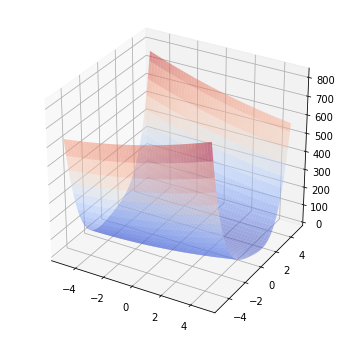

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d

start = -5
end = 5
step = 0.1

x = np.arange(start, end, step)
y = np.arange(start, end, step)

f = lambda x,y : y**4 + 3*y**2 - 4*x*y - 2*y + x**2

plt.figure(figsize=(6,6))
ax = plt.axes(projection="3d")
x, y = np.meshgrid(x,y)
ax.plot_surface(x, y, f(x,y), alpha=0.5, cmap=cm.coolwarm)
plt.show()

**(b)** Starting at the point $(x,y) = (0, 0)$, compute one step of the gradient descent method with backtracking (Armijo) line search.

$$
\begin{array}{l}
\text{Choose}\ \bar{\alpha}>0, \rho\in(0,1)\ c\in(0,1);\ 
\text{Set}\ \alpha\rightarrow\bar{\alpha}\\
\mathbf{repeat}\ \text{until} f(x_k+\alpha p_k)\leq f(x_k)+c\alpha\nabla f_k^Tp_k\\
\qquad\alpha\rightarrow\rho\alpha \\
\textbf{end}
\end{array}
$$

Start with an initial step length $\bar{\alpha}=1$, and use the parameters $c = 1/10$ (sufficient decrease parameter) and   $\rho=1/4$ (contraction factor). The calculations can be done either by hand or by writing a code for it.

**Control question 2:** What value of $\alpha$ is used in this first iteration?

**Control question 3:** What is $(x_1,y_1)$, the next approximation.

**Answer**

In [29]:
import numpy as np

alpha = 1
c = 1/10
rho = 1/4

df = lambda x : np.array([-4*x[1]+2*x[0], 4*x[1]**3+6*x[1]-4*x[0]-2])

x0 = np.array([0,0])

# One iteration
alpha = rho*alpha
x = x0 - alpha * df(x0)

print("alpha: ", alpha)
print("(x1,y1): ", x)

alpha:  0.25
(x1,y1):  [0.  0.5]


**Problem 2** (Module 5) Find the natural cubic spline $S_3(x)$ on the knots $\{-1,0,1\}$ that interepolates the data $S_3(-1)=0, S_3(0)=1, S_3(1)=0$.

**Control question 4:** What is $S_3(1/2)$. 

**Control question 5:** What is $S_3'(1/2)$.

**Answer**

We find the natural cubic spline by the general form

$$
\begin{align*}
    s_{3,i-1}(x) &= M_{i-1} \frac{(x_i-x)^3}{6h_i} + M_{i} \frac{(x-x_{i-1})^3}{6h_i} + C_{i-1}(x-x_{i-1})+\tilde{C}_{i-1}, \\
    C_{i-1} &= \frac{f_i-f_{i-1}}{h_i} - \frac{h_i}{6}(M_i-M_{i-1}), \\
    \tilde{C}_{i-1} &= f_{i-1} - M_{i-1}\frac{h_i^2}{6},
\end{align*}
$$

where $M_{i}$ is found by solving the linear system

$$
\begin{bmatrix}
    2 & \lambda_0 & 0 \\
    \mu_1 & 2 & \lambda_1 \\
    0 & \mu_2 & 2
\end{bmatrix}
\begin{bmatrix} M_0 \\ M_1 \\ M2 \end{bmatrix}
=
\begin{bmatrix} d_0 \\ d_1 \\ d_2 \end{bmatrix}.
$$

We set $\lambda_0 = \mu_2 = 1$, $d_0=d_1$ and $d_2=d_1$, and

$$
\begin{align*}
    \mu_i &= \frac{h_i}{h_i + h_{i+1}}, \\
    \lambda_i &= \frac{h_{i+1}}{h_i + h_{i+1}},
\end{align*}
$$

where

$$
    h_i = x_i - x_{i-1},
$$

for the remaining $i$, meaning $\lambda_1=0.5$ and $\mu_1=0.5$. The remaining part is finding $d_1$, which is given by

$$
\begin{align*}
    d_1 &= \frac{6}{h_i + h_{i+1}}\left(\frac{f_{i+1}-f_{i}}{h_{i+1}} - \frac{f_i-f_{i-1}}{h_i}\right) \\
    &= -6.
\end{align*}
$$

Solving the linear system for $M$, we get $M_0=M_1=M_2=-2$. Finally, we insert all the terms into the cubic spline, giving

$$
    s(x) = 1-x^2,
$$

which interpolates all the data. This result does however not agree with the control questions, so I guess something must be wrong here ...